# Predicting Total Interactions of Facebook page
## Phase 1: Data Preparation, Exploration & Visualisation

#### Group Number: 
45
#### Names & Student IDs of Group Members:
Athul Varghese Thampan, S3958556

Mohamed Bilal Naeem, S3967700


## Table of Contents
* [Introduction](#itr) 
  + [Dataset Source](#Dataset-Source)
  + [Dataset Details](#Dataset-Details)
  + [Dataset Variables](#Dataset-Variables)
  + [Response Variable](#Response-Variable)
* [Goals and Objectives](#Goals-and-Objectives)
* [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
* [Data Exploration and Visualisation](#Data-Exploration-and-Visualisation)
* [Summary and Conclusion](#Summary-and-Conclusion)
* [References](#References)



## Introduction <a id='itr'></a>

### Dataset Source

The Facebook metrics dataset used in this study was sourced from Dr. David Akman's github datasets repository. This dataset is related to Facebook posts published during the year of 2014 on the Facebook page of a renowned cosmetics brand and shows different Facebook metrics.





### Dataset Details

The dataset is about the different Facebook metrics of a renowned cosmetics brand and contains features such as page total likes, type of content, category, post month, post weekday, post hour, paid, lifetime post total reach, lifetime post total impressions, lifetime engaged users, lifetime post consumers,	lifetime post consumptions, lifetime post impressions by people who have liked your page, lifetime post reach by people who like your page,	lifetime people who have liked your page and engaged with your post, comment, like, share and total interactions.

These features will be more than sufficient for predicting total interactions of the Facebook page as a regression problem.

This dataset has a total of 19 features and 500 observations.

**Dataset Retrieval**

- Reading the dataset from the github repository which will be used in this project.
- Displaying 10 random rows.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

pd.set_option('display.max_columns', None) 

###
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")
###

In [2]:
# url of the dataset from github
df_url = 'https://raw.githubusercontent.com/akmand/datasets/main/fb_metrics.csv'
url_content = requests.get(df_url, verify=False).content
fb_df = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

In [3]:
fb_df.sample(10, random_state=999)

,page_total_likes,type,category,post_month,post_weekday,post_hour,paid,lifetime_post_total_reach,lifetime_post_total_impressions,lifetime_engaged_users,lifetime_post_consumers,lifetime_post_consumptions,lifetime_post_impressions_by_people_who_have_liked_your_page,lifetime_post_reach_by_people_who_like_your_page,lifetime_people_who_have_liked_your_page_and_engaged_with_your_post,comment,like,share,total_interactions
195,133594,Photo,2,8,6,10,0.0,5282,8730,703,530,772,5123,3244,470,9,278.0,43.0,330
417,104070,Photo,1,3,3,10,0.0,1874,2474,25,25,31,1483,1062,15,0,0.0,0.0,0
478,86909,Photo,3,1,5,13,0.0,5536,8745,1141,1099,1461,5225,3098,483,1,74.0,31.0,106
280,126345,Photo,2,6,1,12,0.0,3212,4908,735,720,897,3399,2162,375,1,40.0,8.0,49
95,137059,Photo,3,10,6,10,0.0,3090,5744,391,257,360,3521,1796,293,5,153.0,27.0,185
400,107907,Photo,3,4,4,5,1.0,3714,6385,537,481,645,4441,2512,395,5,91.0,26.0,122
443,96749,Photo,3,3,2,9,0.0,5338,9940,589,556,715,8146,3920,363,1,62.0,10.0,73
374,113028,Photo,1,4,4,12,1.0,6880,11736,671,639,889,9389,5232,556,0,59.0,16.0,75
284,126141,Photo,1,6,6,12,0.0,28112,47721,1631,1537,2438,41207,23440,1225,11,129.0,12.0,152
240,130791,Photo,3,7,5,3,0.0,19968,35161,1016,592,909,26701,14792,757,6,535.0,83.0,624


### Dataset Variables

The variables in this dataset are displayed in the table below along with their data type, units and description.

In [4]:
from tabulate import tabulate

table = [['Name','Data Type','Units','Description'],
         ['page_total_likes','Numeric','NA','Total number of likes for the page'],
         ['type','Nominal categorical','NA','Type of content'],
         ['post_month','Date','NA','Month that the post is uploaded'],
         ['post_weekday','Date','NA','Day of the week the post is uploaded'],
         ['post_hour','Date','NA','Time of day the post is uploaded'],
         ['paid','Binary categorical','NA','Whether paid or unpaid for content'],
         ['lifetime_post_total_reach','Numeric','NA','lifetime total reach of the post to users'],
         ['lifetime_post_total_impressions','Numeric','NA','Lifetime total impressions made by the post'],
         ['lifetime_engaged_users','Numeric','NA','Lifetime engagement by users'],
         ['lifetime_post_consumers','Numeric','NA','Lifetime post consumers'],
         ['lifetime_post_consumptions','Numeric','NA','Lifetime post consumptions'],
         ['lifetime_post_impressions_by_people_who_have_liked_your_page','Numeric','NA','Lifetime post impressions by people who liked the page'],
         ['lifetime_post_reach_by_people_who_like_your_page','Numeric','NA','Lifetime post reach by the people who like the page'],
         ['lifetime_people_who_have_liked_your_page_and_engaged_with_your_post','Numeric','NA','Lifetime people who have liked the page and engaged with post'],
         ['comment','Numeric','NA','Number of comments on post'],
         ['like','Numeric','NA','Number of likes on post'],
         ['share','Numeric','NA','Number of shares of post'],
         ['total_interactions','Numeric','NA','Number of total interactions on post']]

print(tabulate(table, headers='firstrow', tablefmt='grid'))

+---------------------------------------------------------------------+---------------------+---------+---------------------------------------------------------------+
| Name                                                                | Data Type           | Units   | Description                                                   |
+=====================================================================+=====================+=========+===============================================================+
| page_total_likes                                                    | Numeric             | NA      | Total number of likes for the page                            |
+---------------------------------------------------------------------+---------------------+---------+---------------------------------------------------------------+
| type                                                                | Nominal categorical | NA      | Type of content                                         

### Response Variable

The response variable in this dataset will be the total interactions of the Facebook page. It will be predicted using the explanatory variables. 

## Goals and Objectives

In the modern world, Social media plays a essential role in Business, culture and relevance. For the case of Facebook, being a prominent Social Media platform understanding the data behind interactions for the social media platforms pages, will be vital in working in the almost 347 billion dollar industry. Users can use predictive analysis to optimize their social media strategy and create the most effective use cases for it.

Thus, the main objective of this project is two-fold: (1) predict the interactions based on available features of the dataset, and (2) which features seem to be the best predictors of the interactions. A secondary objective is to perform some exploratory data analysis by basic descriptive statistics & data visualisation plots to gain some insight into the patterns and relationships existing in the data subsequent to some data cleaning & preprocessing, which is the subject of this Phase 1 report.

## Data Cleaning and Preprocessing

Now we clean and preprocess the data.

Displaying all the columns in the dataset:

In [5]:
fb_df.columns

Index(['page_total_likes', 'type', 'category', 'post_month', 'post_weekday',
       'post_hour', 'paid', 'lifetime_post_total_reach',
       'lifetime_post_total_impressions', 'lifetime_engaged_users',
       'lifetime_post_consumers', 'lifetime_post_consumptions',
       'lifetime_post_impressions_by_people_who_have_liked_your_page',
       'lifetime_post_reach_by_people_who_like_your_page',
       'lifetime_people_who_have_liked_your_page_and_engaged_with_your_post',
       'comment', 'like', 'share', 'total_interactions'],
      dtype='object')

`Category` is a irrelevant feature so it is not important in this dataset and for this project. After the removal, we now have 18 variables and not 19.

In [6]:
#drop irrelevant feature
fb_df = fb_df.drop(columns=['category']) 

Now we check the data types and see whether they match the intended data type.

In [7]:
# Check for data types
print(f"Shape of the dataset = {fb_df.shape} \n")
print(f"Data types are below where 'object' indicates a string type: ")
print(fb_df.dtypes)

Shape of the dataset = (500, 18) 

Data types are below where 'object' indicates a string type: 
page_total_likes                                                         int64
type                                                                    object
post_month                                                               int64
post_weekday                                                             int64
post_hour                                                                int64
paid                                                                   float64
lifetime_post_total_reach                                                int64
lifetime_post_total_impressions                                          int64
lifetime_engaged_users                                                   int64
lifetime_post_consumers                                                  int64
lifetime_post_consumptions                                               int64
lifetime_post_impressions_by_peopl

We will change `paid` column values to strings so that it is easier to work with the data. We will change `0` to `No` and `1` to `Yes` for unpaid and paid respectively.

In [8]:
fb_df["paid"].replace({0: "No", 1: "Yes"}, inplace=True)

Total number of missing values are checked. We can see that `paid`, `like` and `share` features have missing values. So we drop these rows. Now we have 18 columns and 495 rows.

In [9]:
# Count missing values in each column
print(f"\nNumber of missing values in each column:")
print(fb_df.isnull().sum())


Number of missing values in each column:
page_total_likes                                                       0
type                                                                   0
post_month                                                             0
post_weekday                                                           0
post_hour                                                              0
paid                                                                   1
lifetime_post_total_reach                                              0
lifetime_post_total_impressions                                        0
lifetime_engaged_users                                                 0
lifetime_post_consumers                                                0
lifetime_post_consumptions                                             0
lifetime_post_impressions_by_people_who_have_liked_your_page           0
lifetime_post_reach_by_people_who_like_your_page                       0
lifetime_

In [10]:
# Drop all rows with missing values
fb_df = fb_df.dropna()
fb_df.shape

(495, 18)

The unique values for `type` and `paid` is displayed since they are both categorical variables.

In [11]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of categorical features</b>'))
fb_df.describe(include='object').T

,count,unique,top,freq
type,495,4,Photo,421
paid,495,2,No,356


In [12]:
# To see all unique values for categorical data types 
categoricalColumns = fb_df.columns[fb_df.dtypes==object].tolist()

for col in categoricalColumns:
    print('Unique values for ' + col)
    print(fb_df[col].unique())
    print('')

Unique values for type
['Photo' 'Status' 'Link' 'Video']

Unique values for paid
['No' 'Yes']



The summary statistics are generated for all the numerical features.

In [13]:
from IPython.display import display, HTML
display(HTML('<b>Table 2: Summary of numerical features</b>'))
fb_df.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
page_total_likes,495.0,123173.268687,16203.818031,81370.0,112324.0,129600.0,136393.0,139441.0
post_month,495.0,7.028283,3.304274,1.0,4.0,7.0,10.0,12.0
post_weekday,495.0,4.133333,2.030735,1.0,2.0,4.0,6.0,7.0
post_hour,495.0,7.844444,4.385064,1.0,3.0,9.0,11.0,23.0
lifetime_post_total_reach,495.0,14028.101010,22821.050008,238.0,3331.0,5290.0,13248.0,180480.0
lifetime_post_total_impressions,495.0,29856.981818,77142.905000,570.0,5798.0,9084.0,22503.0,1110282.0
lifetime_engaged_users,495.0,926.830303,987.713267,9.0,399.0,630.0,1062.0,11452.0
lifetime_post_consumers,495.0,804.155556,885.184440,9.0,335.0,555.0,969.0,11328.0
lifetime_post_consumptions,495.0,1425.921212,2007.663460,9.0,512.5,861.0,1479.0,19779.0
lifetime_post_impressions_by_people_who_have_liked_your_page,495.0,16916.278788,60074.021711,567.0,4073.5,6282.0,15143.0,1107833.0


#### Random Sampling

Since we are now done cleaning and preprocessing the data, we now display 10 random rows.

In [14]:
fb_df.sample(10, random_state=999)

,page_total_likes,type,post_month,post_weekday,post_hour,paid,lifetime_post_total_reach,lifetime_post_total_impressions,lifetime_engaged_users,lifetime_post_consumers,lifetime_post_consumptions,lifetime_post_impressions_by_people_who_have_liked_your_page,lifetime_post_reach_by_people_who_like_your_page,lifetime_people_who_have_liked_your_page_and_engaged_with_your_post,comment,like,share,total_interactions
321,123047,Photo,6,2,13,No,3418,5659,581,546,770,4491,2620,327,2,51.0,6.0,59
236,131300,Photo,7,7,4,No,10888,19744,913,783,1370,14425,8048,722,12,237.0,45.0,294
137,136013,Photo,10,5,8,No,1080,2427,210,189,249,2195,934,184,4,32.0,3.0,39
416,104070,Status,3,3,15,No,9120,14759,951,937,1290,13246,8004,924,3,25.0,6.0,34
385,109670,Photo,4,5,7,Yes,5298,8875,657,575,874,5640,3206,471,5,140.0,38.0,183
77,137177,Photo,11,1,10,No,22984,59040,438,374,542,12716,4968,262,4,85.0,8.0,97
91,137059,Photo,11,1,9,No,2219,4545,287,220,329,3189,1495,221,0,78.0,13.0,91
294,125612,Photo,6,2,13,No,3600,5807,691,656,913,3351,2110,436,0,72.0,21.0,93
7,139441,Photo,12,7,9,Yes,13720,24137,537,232,305,19728,11056,422,0,325.0,14.0,339
257,129600,Photo,7,3,13,Yes,40336,65309,1407,1330,2251,27771,14848,907,4,104.0,10.0,118


## Data Exploration and Visualisation

The dataset is now clean and we are ready to start visualising and exploring the features.

### One-Variable Visualisation

#### Bar Chart of paid vs unpaid

We count the paid vs unpaid posts to see has the highest count. As we can see in Figure 1, the majority is unpaid posts.

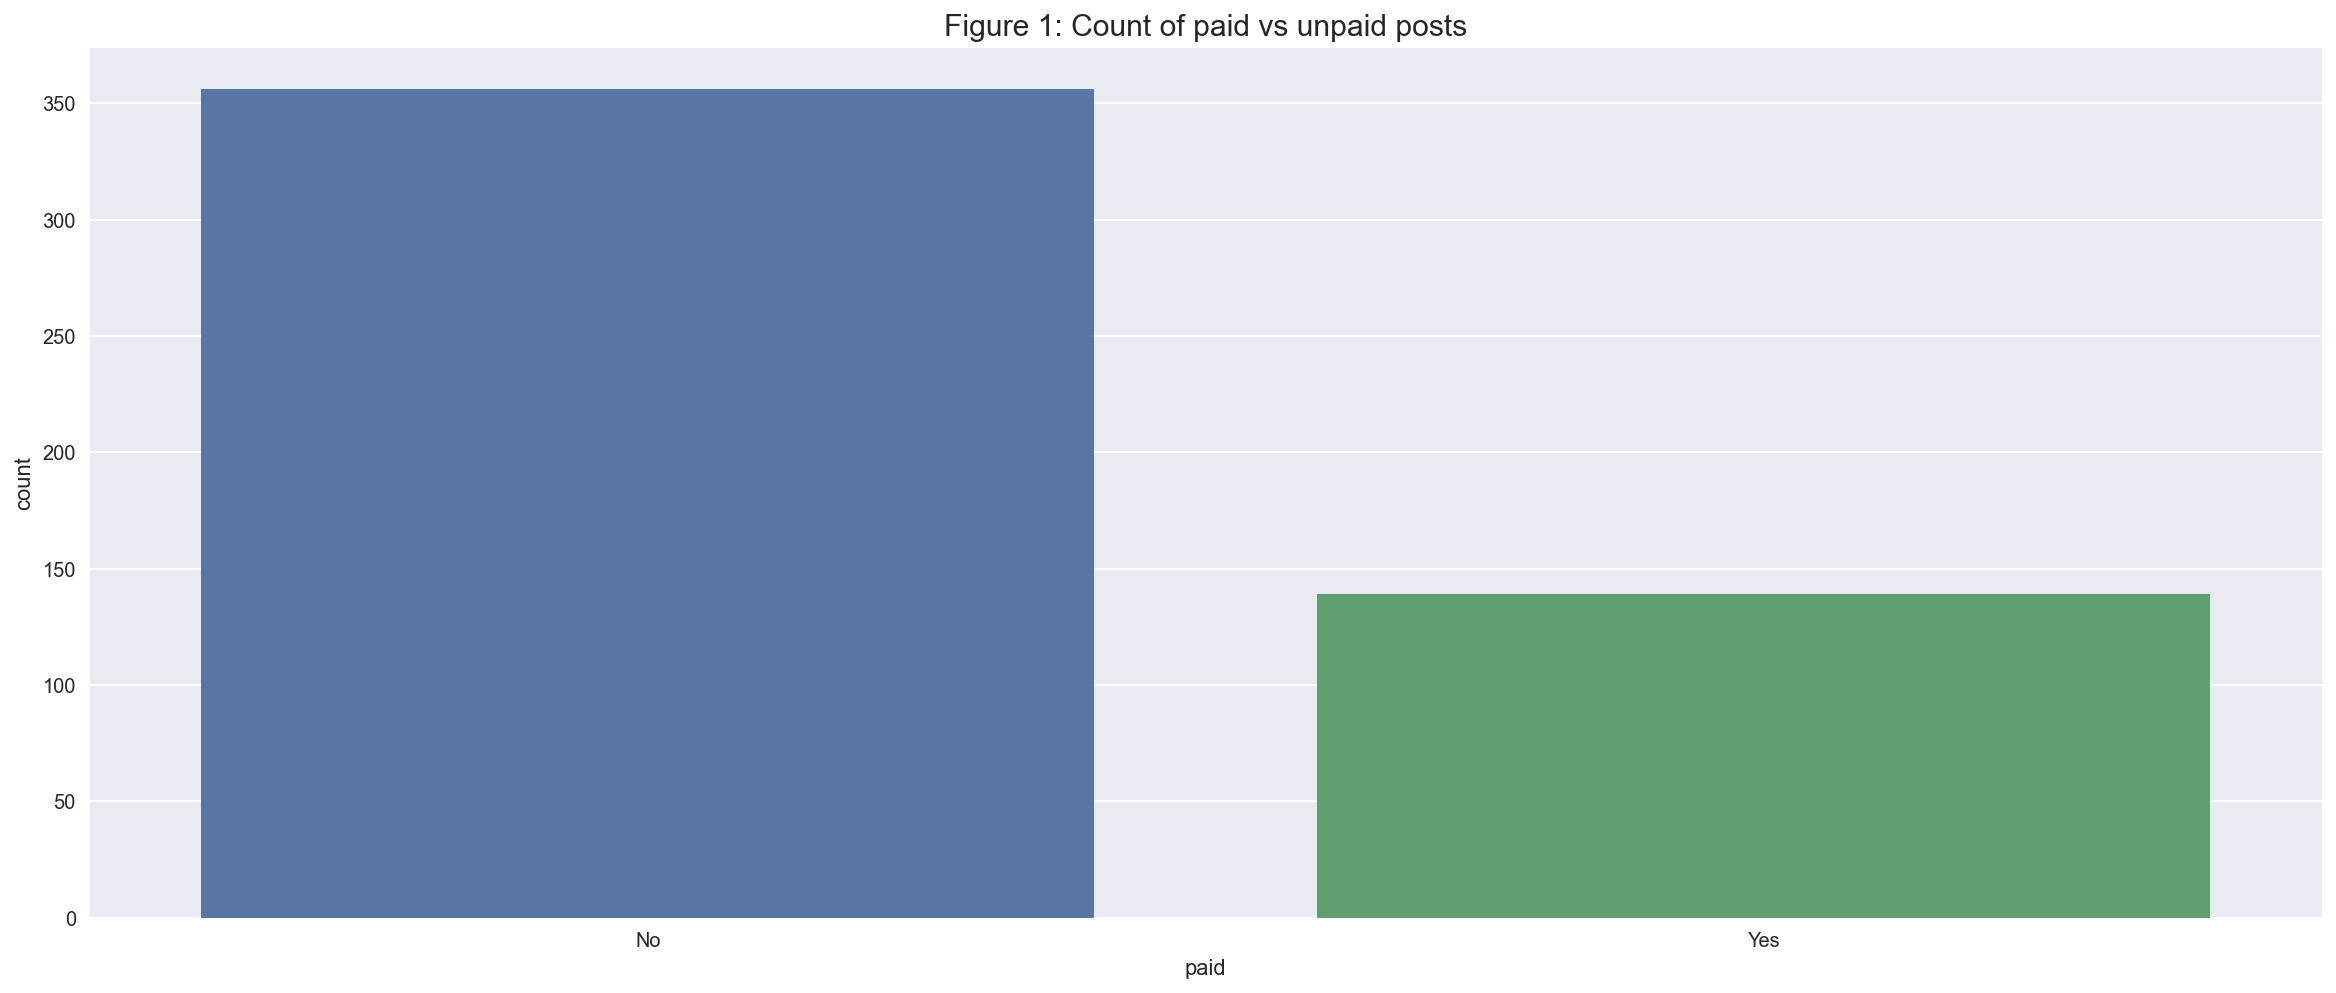

In [15]:
plt.figure(figsize = (20,8))
fig = sns.countplot(x = 'paid', data = fb_df,  
                    order = fb_df['paid'].value_counts().index)
fig = plt.title('Figure 1: Count of paid vs unpaid posts', fontsize = 15)
plt.show()

#### Bar Chart of Content Type

From Figure 2, we can see that the majority of the content is photos by large margin.

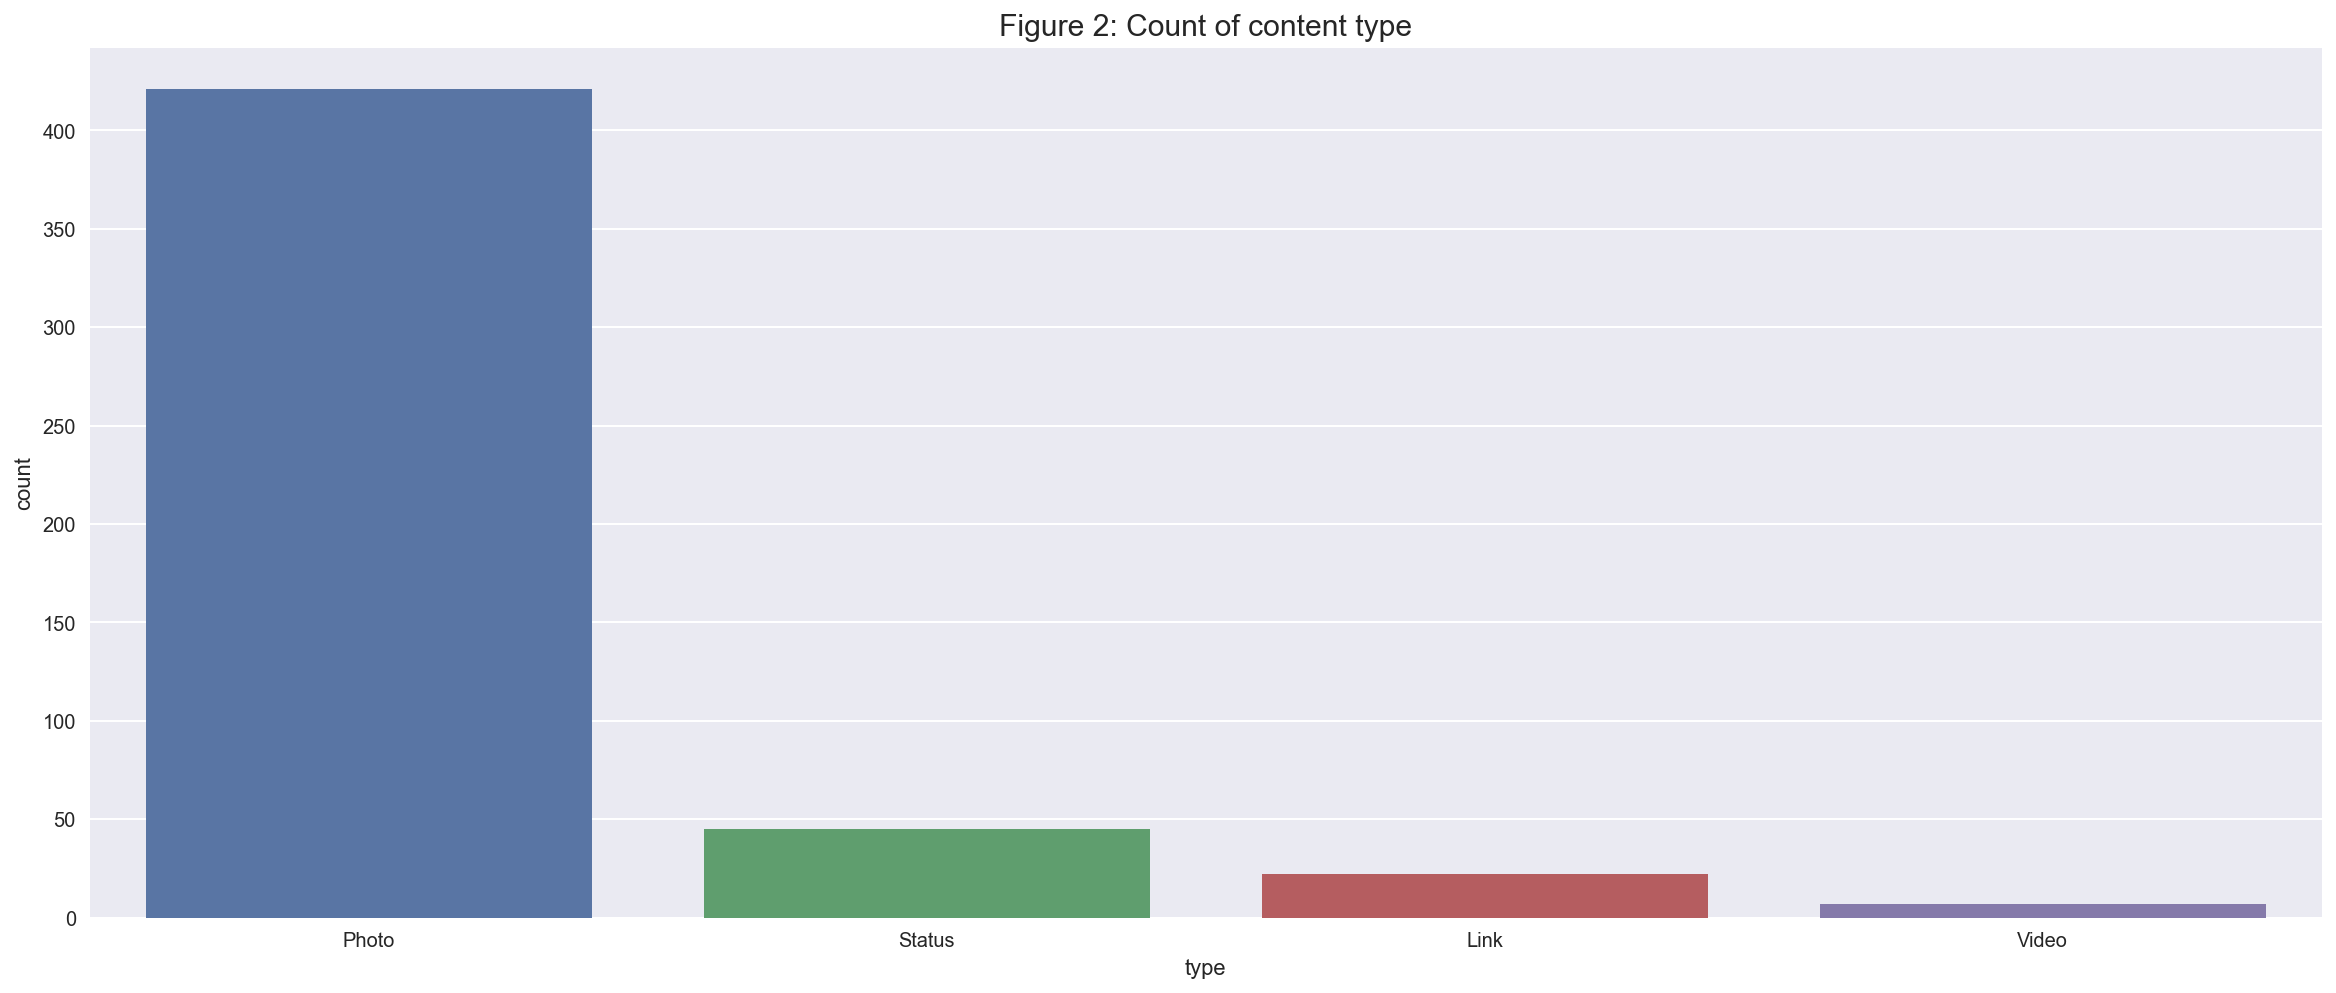

In [16]:
plt.figure(figsize = (20,8))
fig = sns.countplot(x = 'type', data = fb_df,
                    order = fb_df['type'].value_counts().index)
fig = plt.title('Figure 2: Count of content type', fontsize = 15)
plt.show()

#### Histogram of likes

We can see in Figure 3 that the distribution of likes is right-skewed and unimodal.

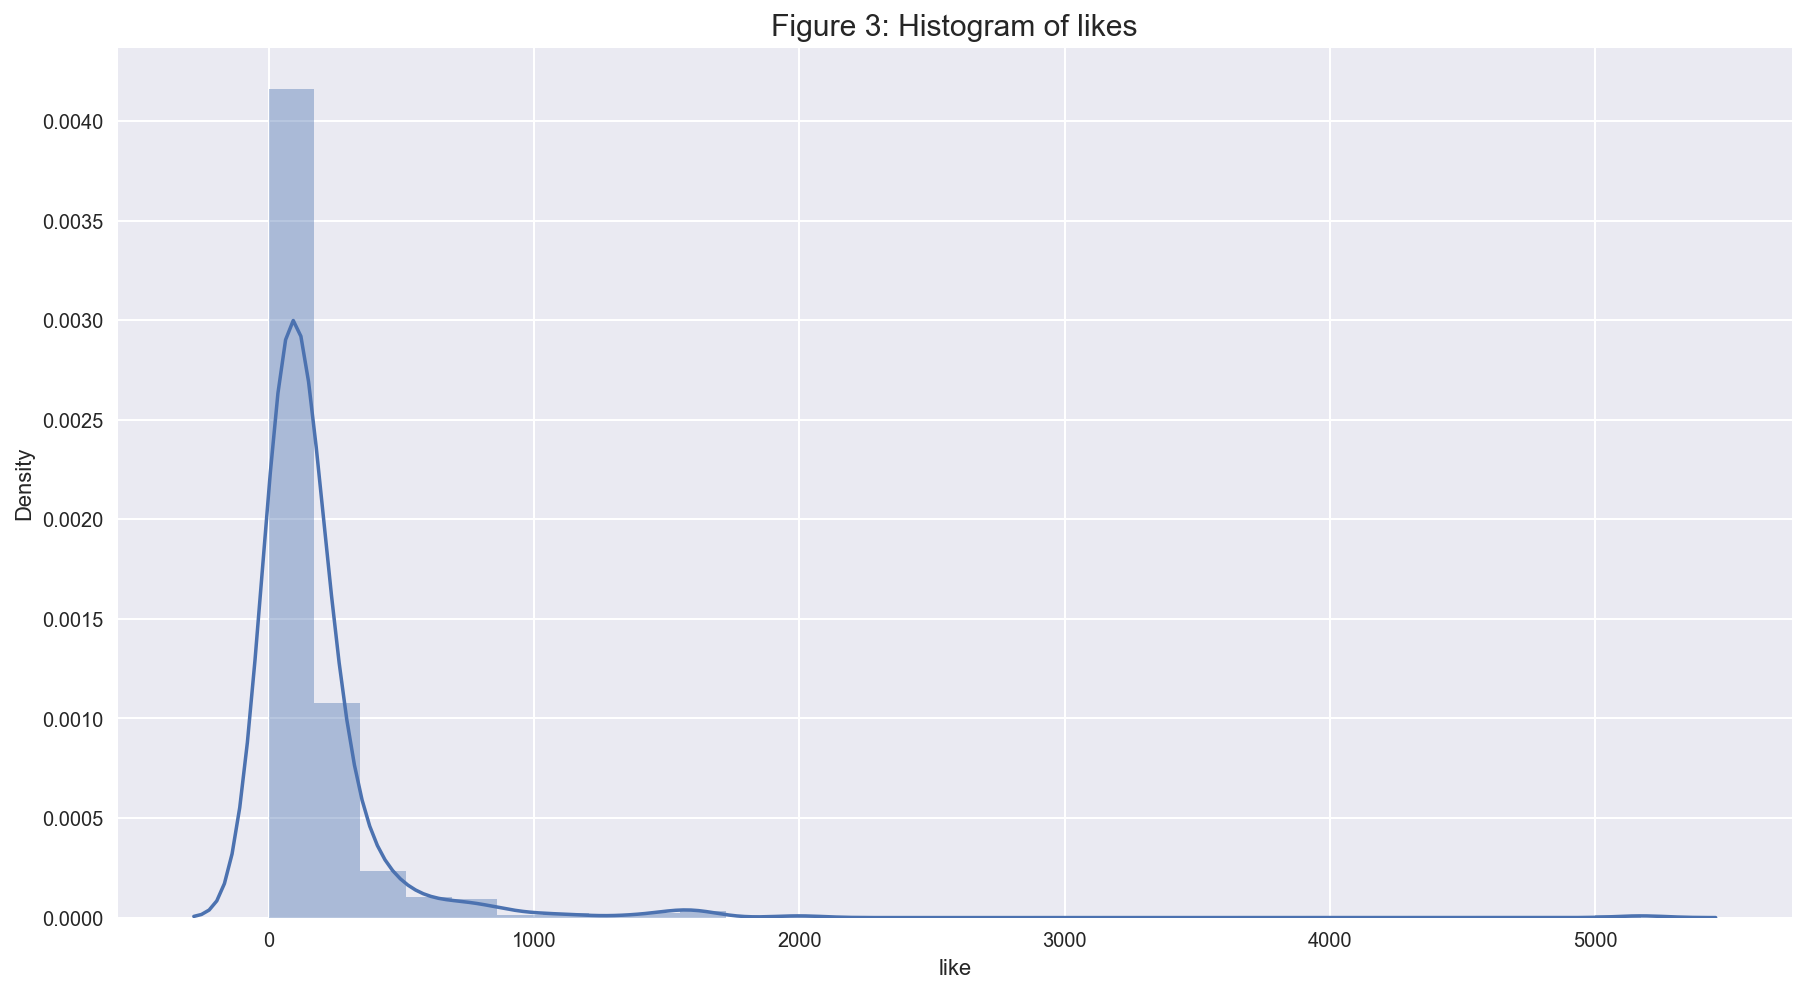

In [17]:
# Histogram of likes
plt.figure(figsize = (15,8))
sns.distplot(fb_df['like'], kde=True, bins=30).set_title('Figure 3: Histogram of likes', fontsize = 15)
plt.show();

### Two-Variable Visualisation

#### Scatterplot of likes and total interactions

Figure 4 shows that as likes increase the total interactions also increase.

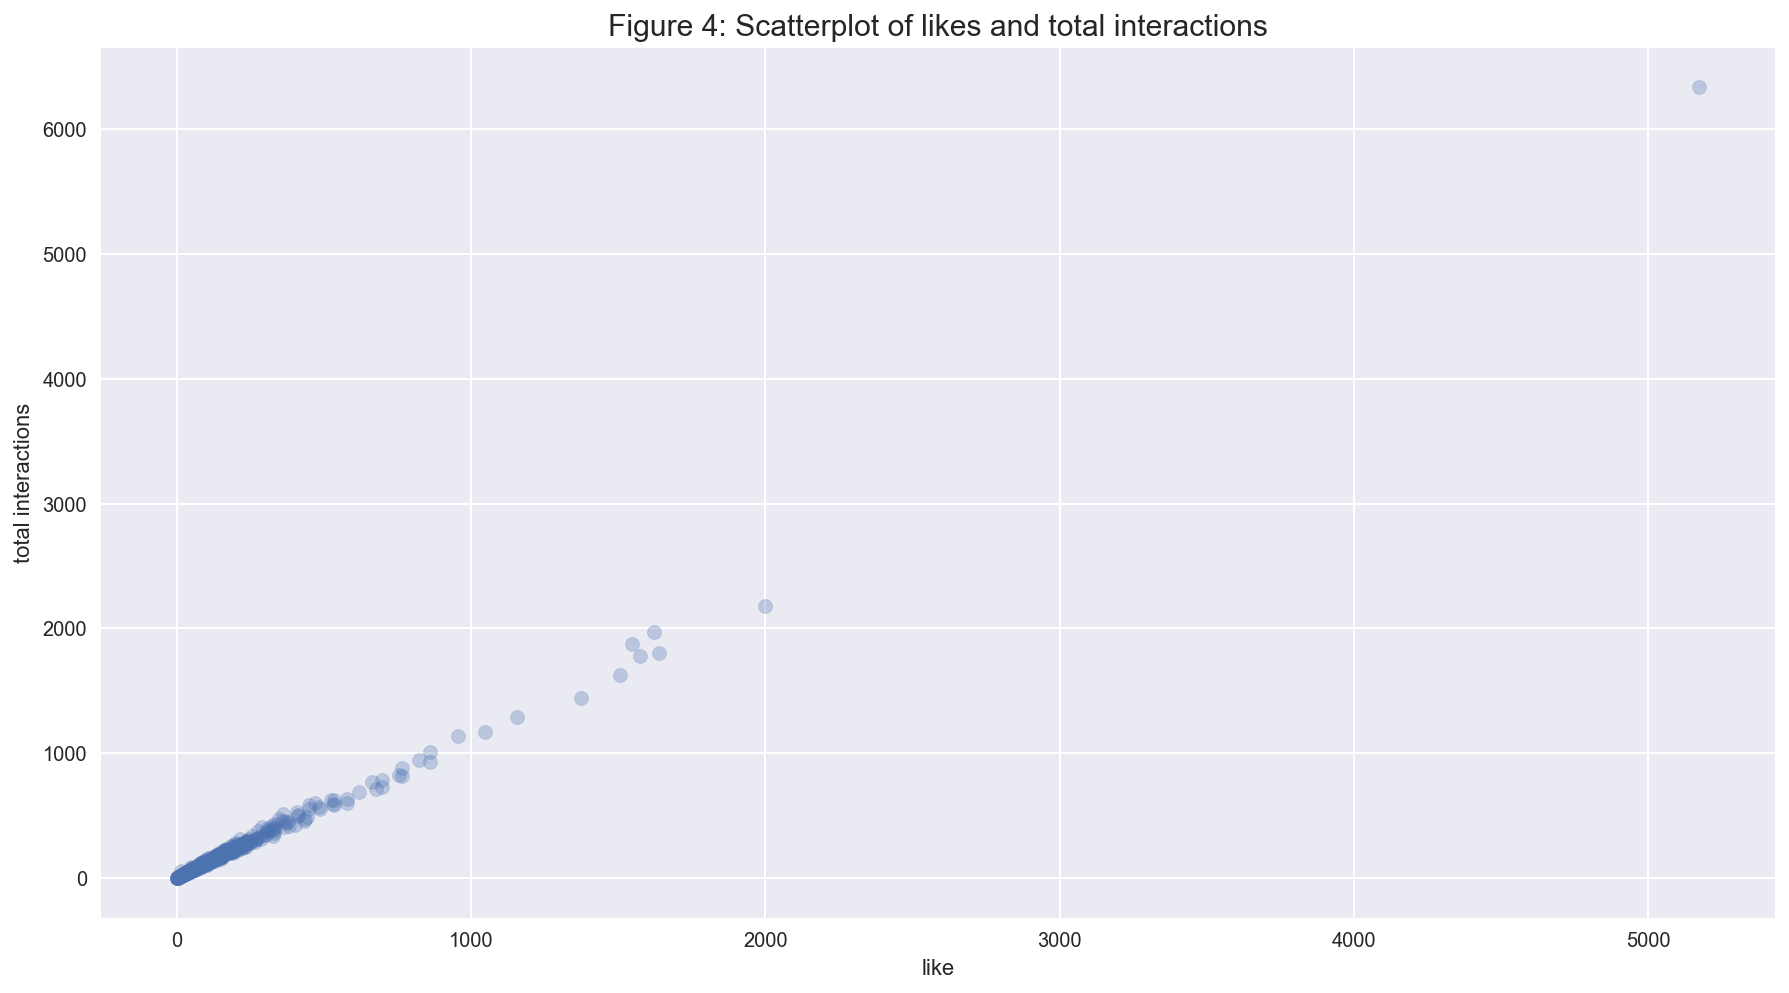

In [18]:
plt.figure(figsize = (15,8))
plt.scatter(fb_df['like'], fb_df['total_interactions'], alpha = 0.3)
plt.title('Figure 4: Scatterplot of likes and total interactions', fontsize = 15)
plt.xlabel('like')
plt.ylabel('total interactions')
plt.show();

#### Scatterplot of Page Total Likes and Total Interactions

From figure 5, it seems that there are no direct correlation between the page total likes and total interactions.


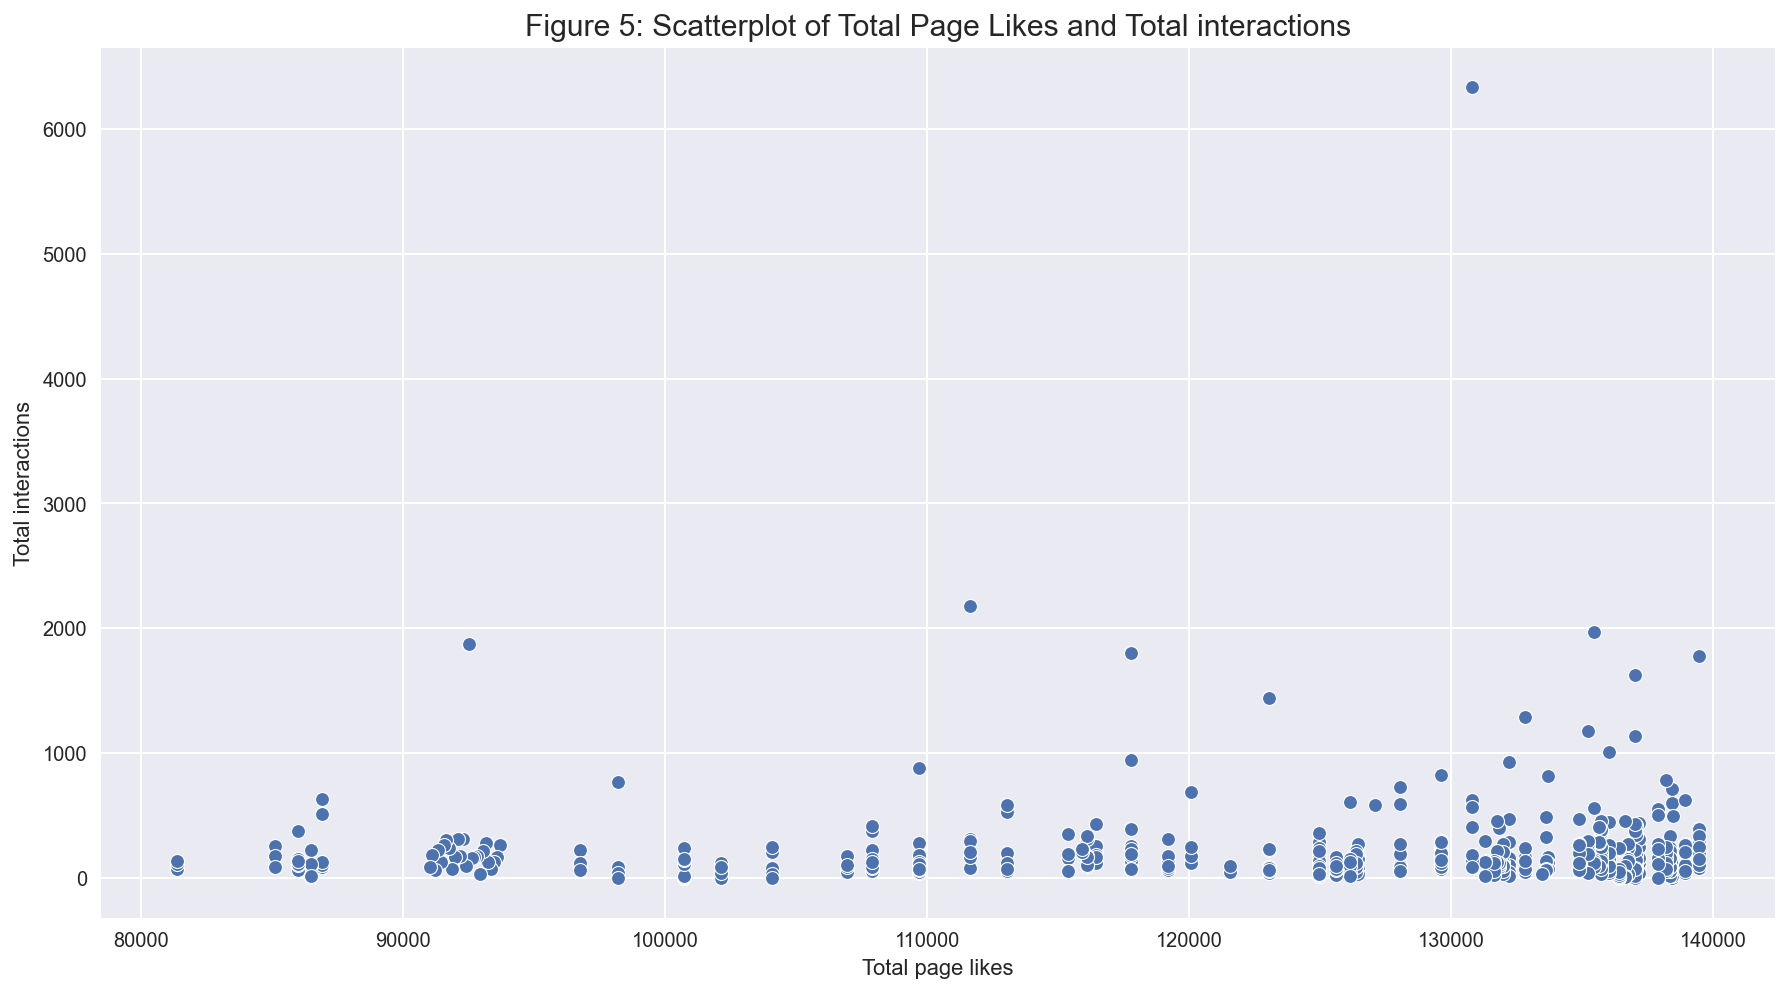

In [19]:
plt.figure(figsize = (15,8))
sns.scatterplot(fb_df['page_total_likes'], fb_df['total_interactions']);
plt.title('Figure 5: Scatterplot of Total Page Likes and Total interactions', fontsize = 15)
plt.xlabel('Total page likes')
plt.ylabel('Total interactions')
plt.show();

#### Scatterplot of Lifetime engaged users and Lifetime post consumers

In figure 6, we can see that Lifetime engaged users and Lifetime post consumers are correlated and is directly proportional.

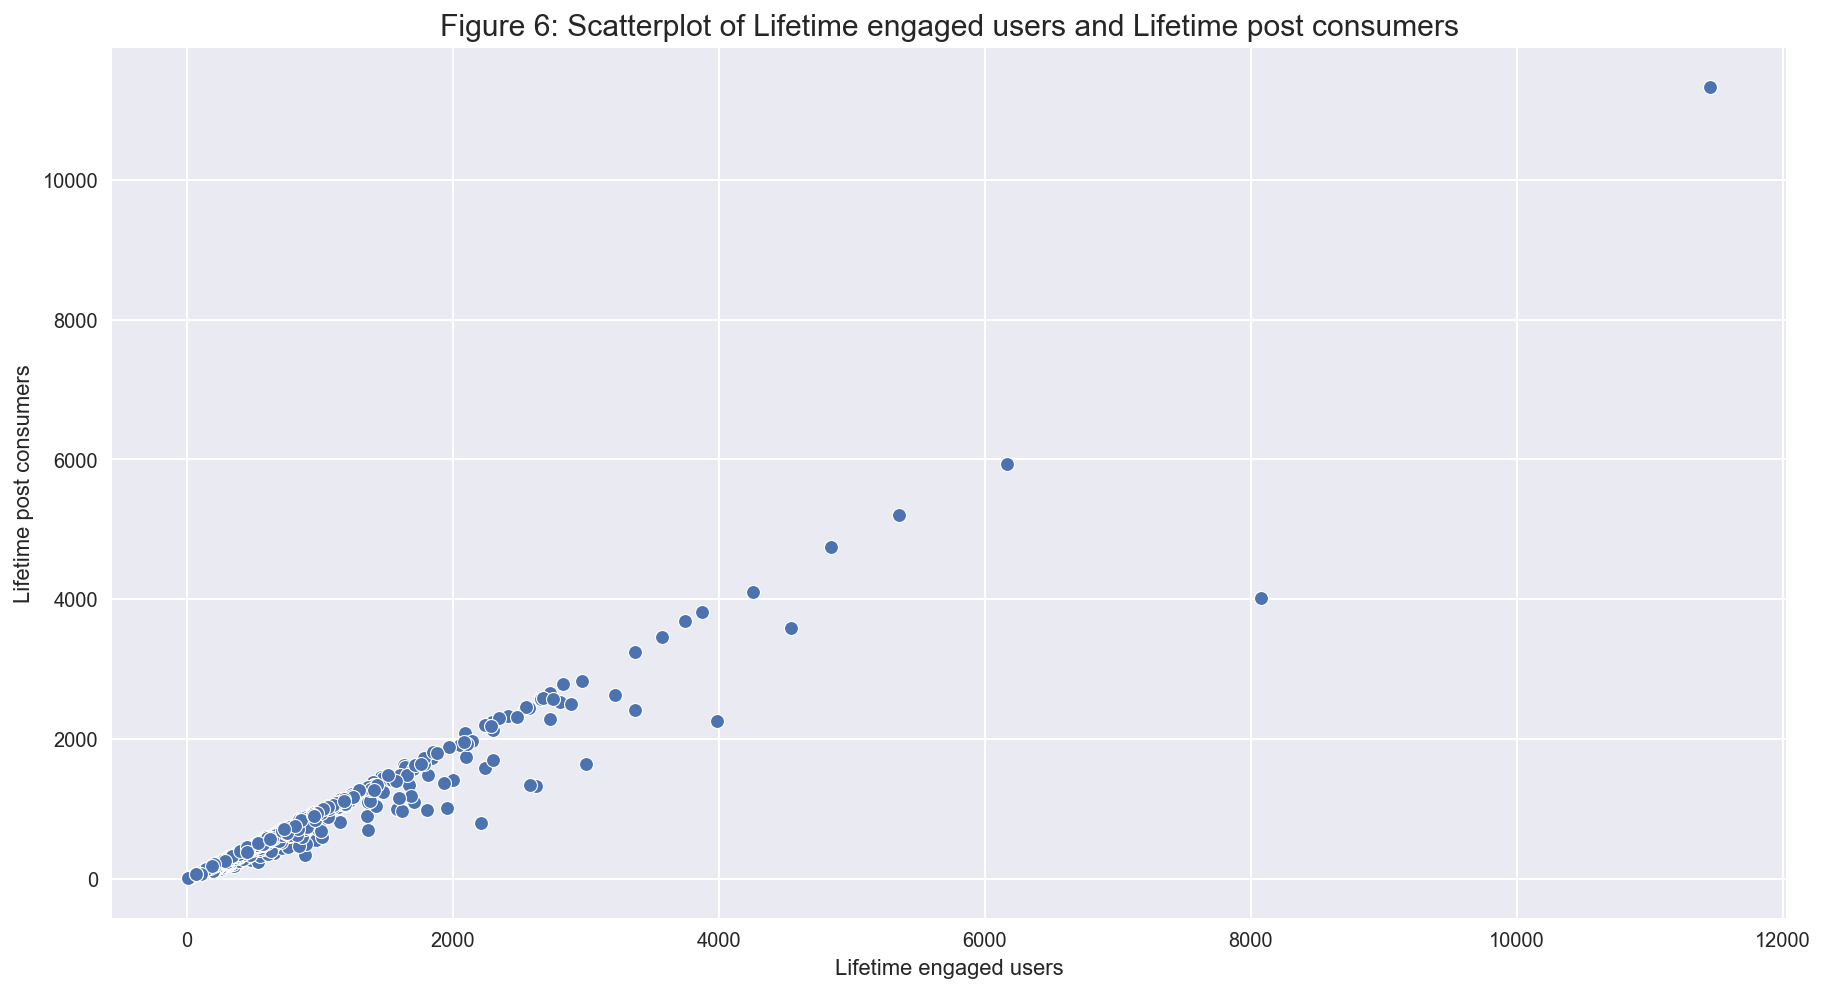

In [20]:
plt.figure(figsize = (15,8))
sns.scatterplot(fb_df['lifetime_engaged_users'], fb_df['lifetime_post_consumers']);
plt.title('Figure 6: Scatterplot of Lifetime engaged users and Lifetime post consumers', fontsize = 15)
plt.xlabel('Lifetime engaged users')
plt.ylabel('Lifetime post consumers')
plt.show();

### Three-Variable Visualisation

#### Scatterplot of Likes and Comments by Paid
In figure 7, we can see that the likes and comments are somewhat similar whether paid or unpaid. There are some outliers visible.

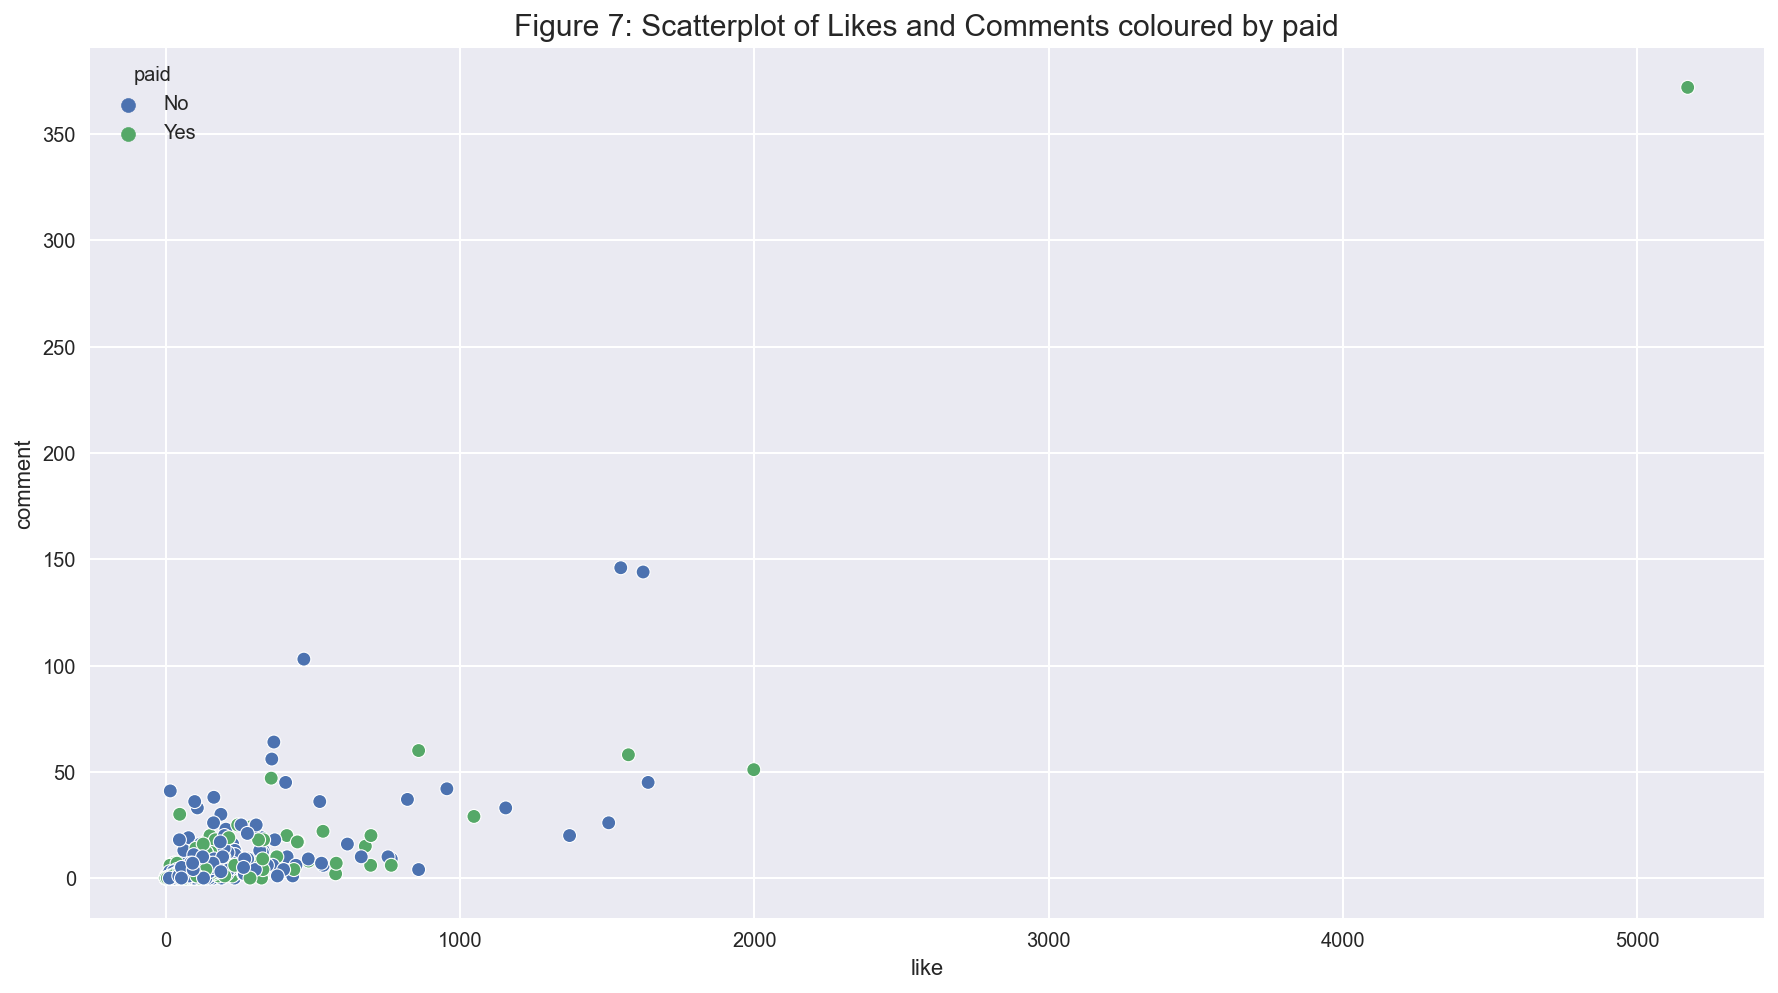

In [26]:
plt.figure(figsize = (15,8))
sp = sns.scatterplot(fb_df['like'], fb_df['comment'], hue = fb_df['paid'])
plt.title('Figure 7: Scatterplot of Likes and Comments coloured by paid', fontsize = 15);
 
plt.show();

#### title



#### title



## Summary and Conclusions

-

## References

- 

***